## Steps to be followed in the project
1. Load dataset
2. Perform EDA
3. Split the data into Train-Test Data
4. Model selection and model building
5. Hyper parameter tuning
6. Evaluation

In [58]:
# importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn.model_selection
import numpy as np
import seaborn as sn

In [59]:
# loading the dataset
df = pd.read_csv('IndianWhetherData.csv')

In [60]:
df.head()

,ID,YEAR,1,2,3,4,5,6,7,8,9,10,11,12
0,0,1901,17.99,19.43,23.49,26.41,28.28,28.60,27.49,26.98,26.26,25.08,21.73,18.95
1,1,1902,19.00,20.39,24.10,26.54,28.68,28.44,27.29,27.05,25.95,24.37,21.33,18.78
2,2,1903,18.32,19.79,22.46,26.03,27.93,28.41,28.04,26.63,26.34,24.57,20.96,18.29
3,3,1904,17.77,19.39,22.95,26.73,27.83,27.85,26.84,26.73,25.84,24.36,21.07,18.84
4,4,1905,17.40,17.79,21.78,24.84,28.32,28.69,27.67,27.47,26.29,26.16,22.07,18.71


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      117 non-null    int64  
 1   YEAR    117 non-null    int64  
 2   1       117 non-null    float64
 3   2       117 non-null    float64
 4   3       117 non-null    float64
 5   4       117 non-null    float64
 6   5       117 non-null    float64
 7   6       117 non-null    float64
 8   7       117 non-null    float64
 9   8       117 non-null    float64
 10  9       117 non-null    float64
 11  10      117 non-null    float64
 12  11      117 non-null    float64
 13  12      117 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 12.9 KB


In [62]:
df.columns

Index(['ID', 'YEAR', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
       '12'],
      dtype='object')

In [63]:
# before splitting we need drop the ID  and YEAR column as it just acts as an index, which a Pandas dataframe has by default

df.drop(['ID', 'YEAR'] , axis =1, inplace = True)
df

,1,2,3,4,5,6,7,8,9,10,11,12
0,17.99,19.43,23.49,26.41,28.28,28.60,27.49,26.98,26.26,25.08,21.73,18.95
1,19.00,20.39,24.10,26.54,28.68,28.44,27.29,27.05,25.95,24.37,21.33,18.78
2,18.32,19.79,22.46,26.03,27.93,28.41,28.04,26.63,26.34,24.57,20.96,18.29
3,17.77,19.39,22.95,26.73,27.83,27.85,26.84,26.73,25.84,24.36,21.07,18.84
4,17.40,17.79,21.78,24.84,28.32,28.69,27.67,27.47,26.29,26.16,22.07,18.71
...,...,...,...,...,...,...,...,...,...,...,...,...
112,18.88,21.07,24.53,26.97,29.06,28.24,27.50,27.22,26.87,25.63,22.18,19.69
113,18.81,20.35,23.34,26.91,28.45,29.42,28.07,27.42,26.61,25.38,22.53,19.50
114,19.02,21.23,23.52,26.52,28.82,28.15,28.03,27.64,27.04,25.82,22.95,20.21
115,20.92,23.58,26.61,29.56,30.41,29.70,28.18,28.17,27.72,26.81,23.90,21.89


In [64]:
df = df.T
df

,0,1,2,3,4,5,6,7,8,9,...,107,108,109,110,111,112,113,114,115,116
1,17.99,19.00,18.32,17.77,17.40,17.50,19.27,18.35,17.79,18.14,...,18.49,19.79,19.15,18.32,18.25,18.88,18.81,19.02,20.92,20.59
2,19.43,20.39,19.79,19.39,17.79,19.14,19.42,19.73,19.05,19.72,...,19.83,21.66,21.23,20.79,20.43,21.07,20.35,21.23,23.58,23.08
3,23.49,24.10,22.46,22.95,21.78,22.21,22.03,22.93,23.40,22.90,...,24.43,24.55,26.53,24.11,23.98,24.53,23.34,23.52,26.61,25.58
4,26.41,26.54,26.03,26.73,24.84,26.53,26.98,27.06,25.76,25.96,...,26.54,27.35,28.40,26.10,26.89,26.97,26.91,26.52,29.56,29.17
5,28.28,28.68,27.93,27.83,28.32,29.06,27.52,28.07,27.97,28.36,...,28.42,28.71,29.19,28.92,28.72,29.06,28.45,28.82,30.41,30.47
6,28.60,28.44,28.41,27.85,28.69,28.02,27.66,28.49,27.67,27.72,...,28.10,28.77,28.51,28.60,28.91,28.24,29.42,28.15,29.70,29.44
7,27.49,27.29,28.04,26.84,27.67,27.46,27.28,27.16,26.56,26.93,...,27.50,27.83,27.55,27.60,27.98,27.50,28.07,28.03,28.18,28.31
8,26.98,27.05,26.63,26.73,27.47,26.82,26.38,26.41,26.43,26.61,...,27.00,27.85,27.33,27.20,27.31,27.22,27.42,27.64,28.17,28.12
9,26.26,25.95,26.34,25.84,26.29,26.23,26.26,25.74,25.47,25.98,...,26.44,27.11,26.60,26.70,26.65,26.87,26.61,27.04,27.72,28.11
10,25.08,24.37,24.57,24.36,26.16,24.75,24.72,24.25,24.37,24.04,...,25.47,25.20,25.58,25.51,24.85,25.63,25.38,25.82,26.81,27.24


In [65]:
# checking for missing values
df.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
112    0
113    0
114    0
115    0
116    0
Length: 117, dtype: int64

In [66]:
# checking for duplicates. Data redundancy in a dataset consume computational resources, decreasing the machines efficiency
df.duplicated()

1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
dtype: bool

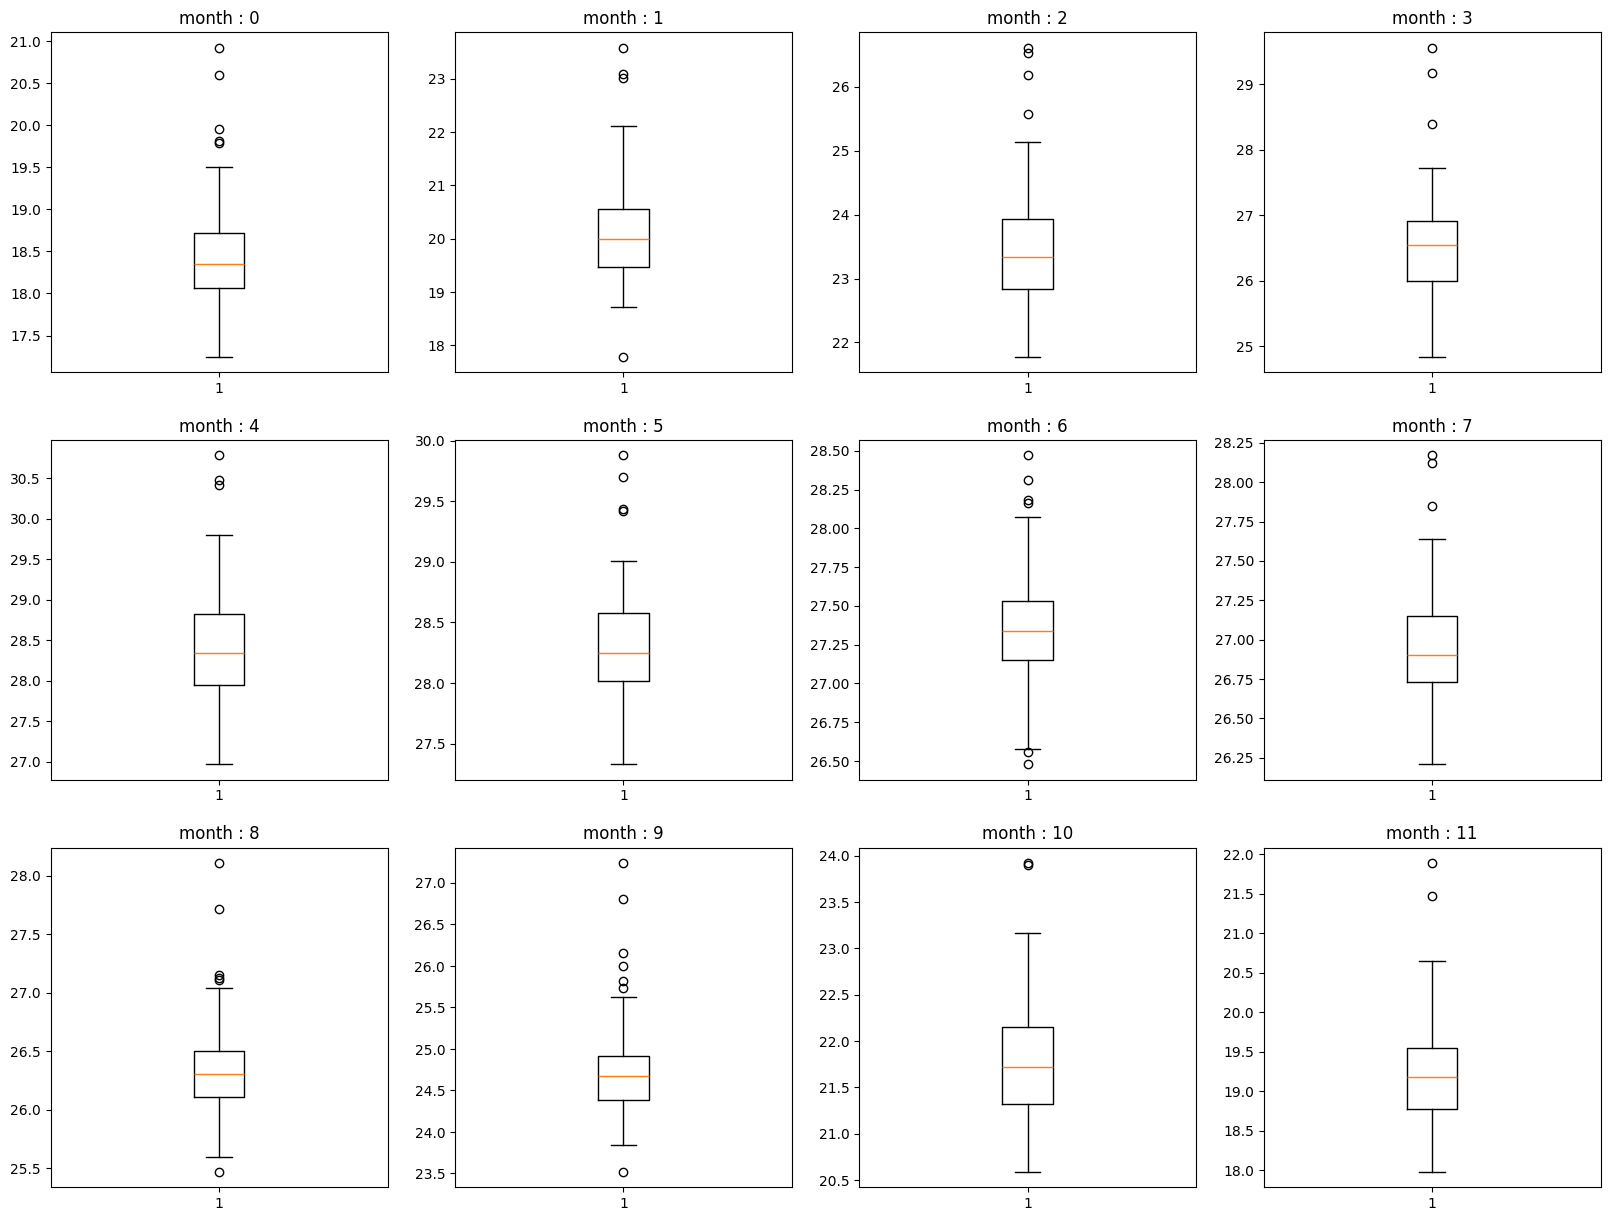

In [67]:
#finding outliers
fig, axs = plt.subplots(3, 4, figsize = (20, 15))

col = 0
for r in range(3):
    for c in range(4):
        axs[r, c].boxplot(df.iloc[col,:])
        title = 'month : ' + str(col)
        axs[r, c].set_title(title)
        col = col+1

## there finger count number of outliers, which cannot be excused in case of small datasets like the current dataset

In [68]:
# transposing the x_train for time being due to ease of computation
df = df.T
df

,1,2,3,4,5,6,7,8,9,10,11,12
0,17.99,19.43,23.49,26.41,28.28,28.60,27.49,26.98,26.26,25.08,21.73,18.95
1,19.00,20.39,24.10,26.54,28.68,28.44,27.29,27.05,25.95,24.37,21.33,18.78
2,18.32,19.79,22.46,26.03,27.93,28.41,28.04,26.63,26.34,24.57,20.96,18.29
3,17.77,19.39,22.95,26.73,27.83,27.85,26.84,26.73,25.84,24.36,21.07,18.84
4,17.40,17.79,21.78,24.84,28.32,28.69,27.67,27.47,26.29,26.16,22.07,18.71
...,...,...,...,...,...,...,...,...,...,...,...,...
112,18.88,21.07,24.53,26.97,29.06,28.24,27.50,27.22,26.87,25.63,22.18,19.69
113,18.81,20.35,23.34,26.91,28.45,29.42,28.07,27.42,26.61,25.38,22.53,19.50
114,19.02,21.23,23.52,26.52,28.82,28.15,28.03,27.64,27.04,25.82,22.95,20.21
115,20.92,23.58,26.61,29.56,30.41,29.70,28.18,28.17,27.72,26.81,23.90,21.89


## outliers are trimmed from the dataste using Inter Quartile Range approach

In [69]:
for c in df.columns:
    percentile75 = df[c].quantile(0.75)
    percentile25 = df[c].quantile(0.25)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    df = df[(df[c] < upper_limit) & (df[c] > lower_limit)]

In [70]:
df

,1,2,3,4,5,6,7,8,9,10,11,12
0,17.99,19.43,23.49,26.41,28.28,28.60,27.49,26.98,26.26,25.08,21.73,18.95
1,19.00,20.39,24.10,26.54,28.68,28.44,27.29,27.05,25.95,24.37,21.33,18.78
3,17.77,19.39,22.95,26.73,27.83,27.85,26.84,26.73,25.84,24.36,21.07,18.84
5,17.50,19.14,22.21,26.53,29.06,28.02,27.46,26.82,26.23,24.75,21.93,19.55
6,19.27,19.42,22.03,26.98,27.52,27.66,27.28,26.38,26.26,24.72,22.11,18.46
...,...,...,...,...,...,...,...,...,...,...,...,...
102,18.60,21.03,23.62,27.29,28.64,29.01,27.53,27.25,26.75,24.92,22.17,19.59
104,19.07,20.51,24.14,26.62,28.22,28.99,27.34,27.41,26.82,24.84,21.73,19.23
106,19.24,20.97,23.52,27.72,28.84,28.31,27.66,27.37,26.61,24.92,22.40,19.65
110,18.32,20.79,24.11,26.10,28.92,28.60,27.60,27.20,26.70,25.51,22.84,19.84


## the rows count is reduced from 116 to 93, which means around 13 rows containing outliers are trimmed

In [71]:
# applying transpose again to get back the original df dataset
df = df.T
df

,0,1,3,5,6,7,9,10,11,12,...,93,96,97,98,99,102,104,106,110,111
1,17.99,19.00,17.77,17.50,19.27,18.35,18.14,18.52,18.60,18.20,...,19.33,17.86,18.84,18.32,18.87,18.60,19.07,19.24,18.32,18.25
2,19.43,20.39,19.39,19.14,19.42,19.73,19.72,19.18,20.84,19.98,...,20.20,19.88,20.60,21.26,19.78,21.03,20.51,20.97,20.79,20.43
3,23.49,24.10,22.95,22.21,22.03,22.93,22.90,22.05,22.93,22.15,...,24.14,23.64,22.98,24.18,23.22,23.62,24.14,23.52,24.11,23.98
4,26.41,26.54,26.73,26.53,26.98,27.06,25.96,26.00,26.21,26.61,...,26.04,25.55,27.00,27.66,27.27,27.29,26.62,27.72,26.10,26.89
5,28.28,28.68,27.83,29.06,27.52,28.07,28.36,28.55,28.30,27.95,...,28.72,27.86,29.18,28.13,28.92,28.64,28.22,28.84,28.92,28.72
6,28.60,28.44,27.85,28.02,27.66,28.49,27.72,28.02,28.53,27.91,...,28.56,28.33,28.88,27.95,28.02,29.01,28.99,28.31,28.60,28.91
7,27.49,27.29,26.84,27.46,27.28,27.16,26.93,27.44,27.49,27.00,...,27.34,28.01,27.78,27.58,27.34,27.53,27.34,27.66,27.60,27.98
8,26.98,27.05,26.73,26.82,26.38,26.41,26.61,27.04,26.68,26.80,...,27.01,27.27,27.42,27.08,26.98,27.25,27.41,27.37,27.20,27.31
9,26.26,25.95,25.84,26.23,26.26,25.74,25.98,26.22,25.81,26.02,...,26.31,26.81,26.70,26.90,26.53,26.75,26.82,26.61,26.70,26.65
10,25.08,24.37,24.36,24.75,24.72,24.25,24.04,24.57,24.44,24.35,...,24.56,24.48,25.27,24.97,25.58,24.92,24.84,24.92,25.51,24.85


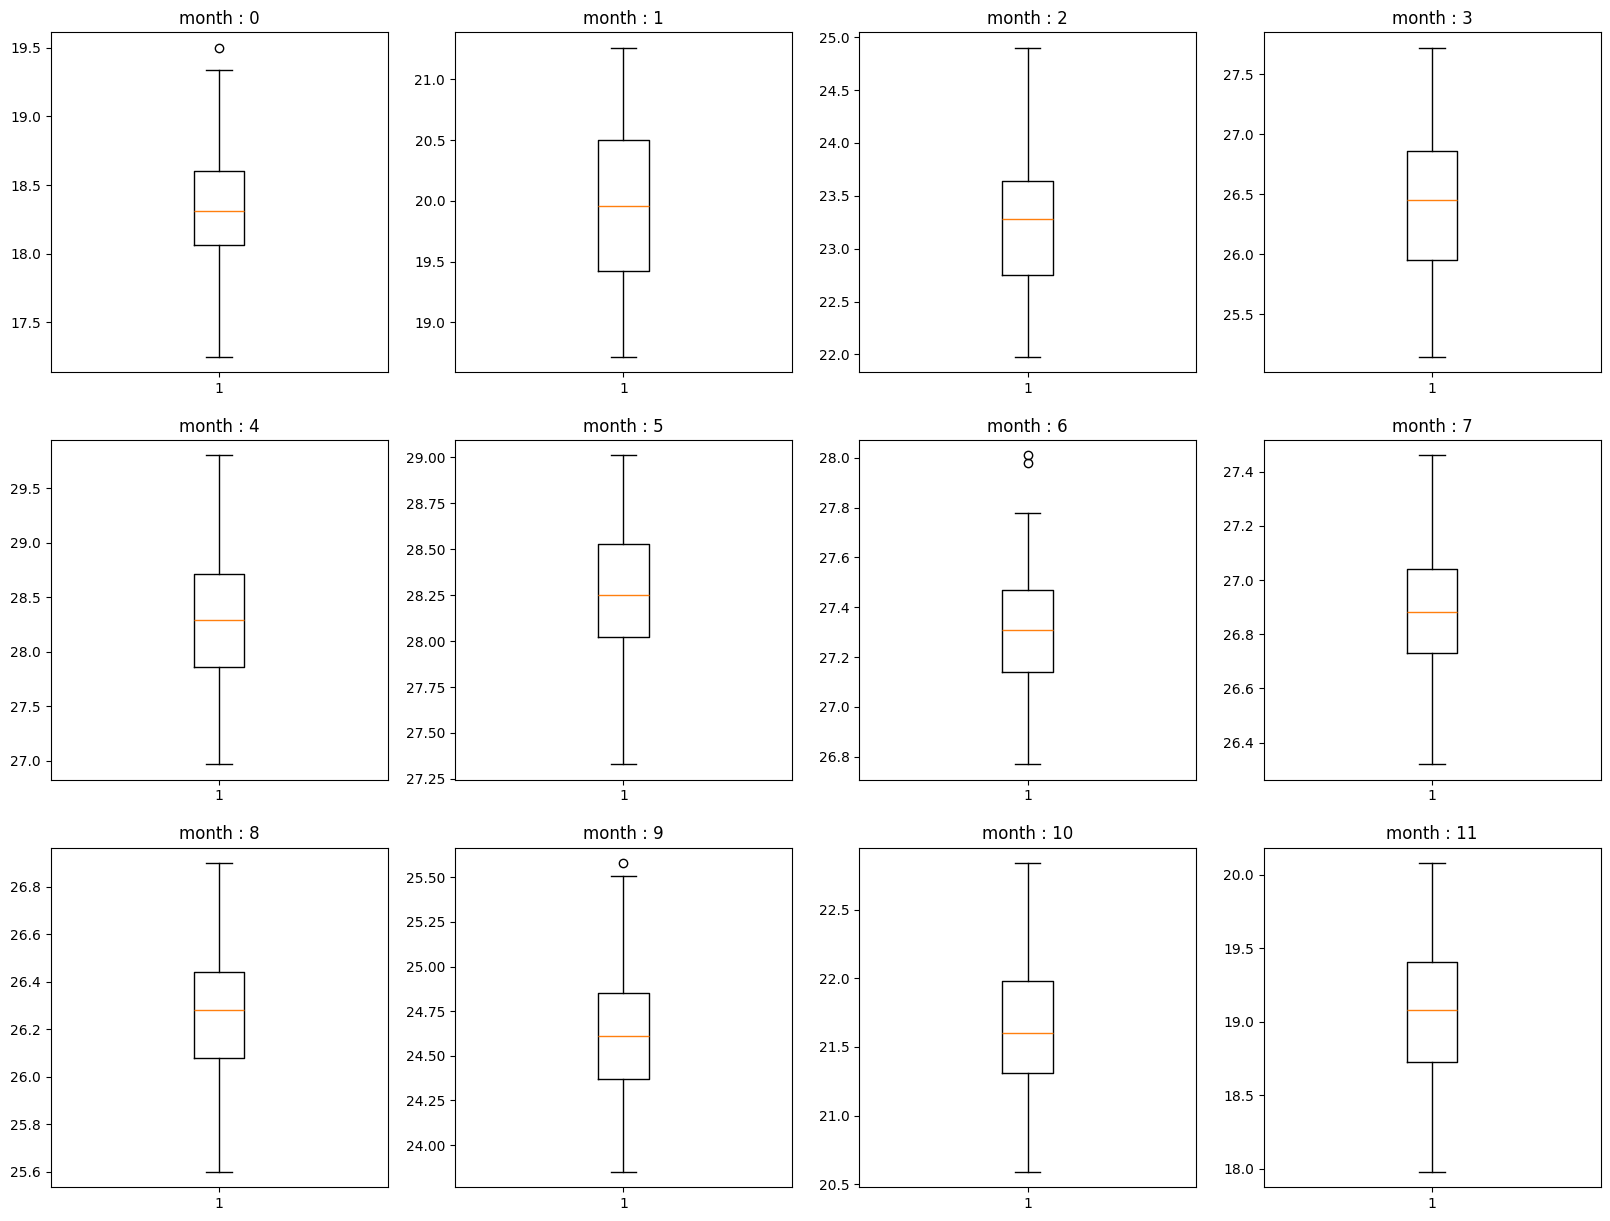

In [72]:
# plotting box graphs again to verify the change after trimming outliers
fig, axs = plt.subplots(3, 4, figsize = (20, 15))

col = 0
for r in range(3):
    for c in range(4):
        axs[r, c].boxplot(df.iloc[col,:])
        title = 'month : ' + str(col)
        axs[r, c].set_title(title)
        col = col+1

## from the boxplots it is very clear thet most of the dataset is outliers free

<Axes: >

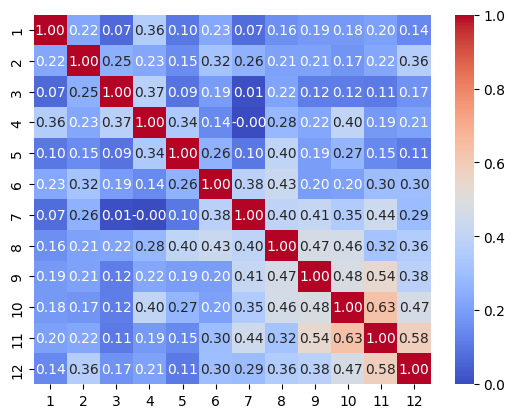

In [73]:
# finding correlation among the features
corr = df.T.corr()
sn.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")

## the heatmap clearly shows that the features are not very related, and are independent

## Model Selection
- relationship between the independent features and dependent features play a major role in model selection
- let us plot a scatter plot between 10 randomly selected years against target year ( df[116] )

  *we use exception handling in plotting the scatter plot because the randomly generated years by the function :- `np.random.randint(0, 92, 10)`, may or may not be present in df. Because there are high chances that the particular year maybe deleted during trmiing the outliers*

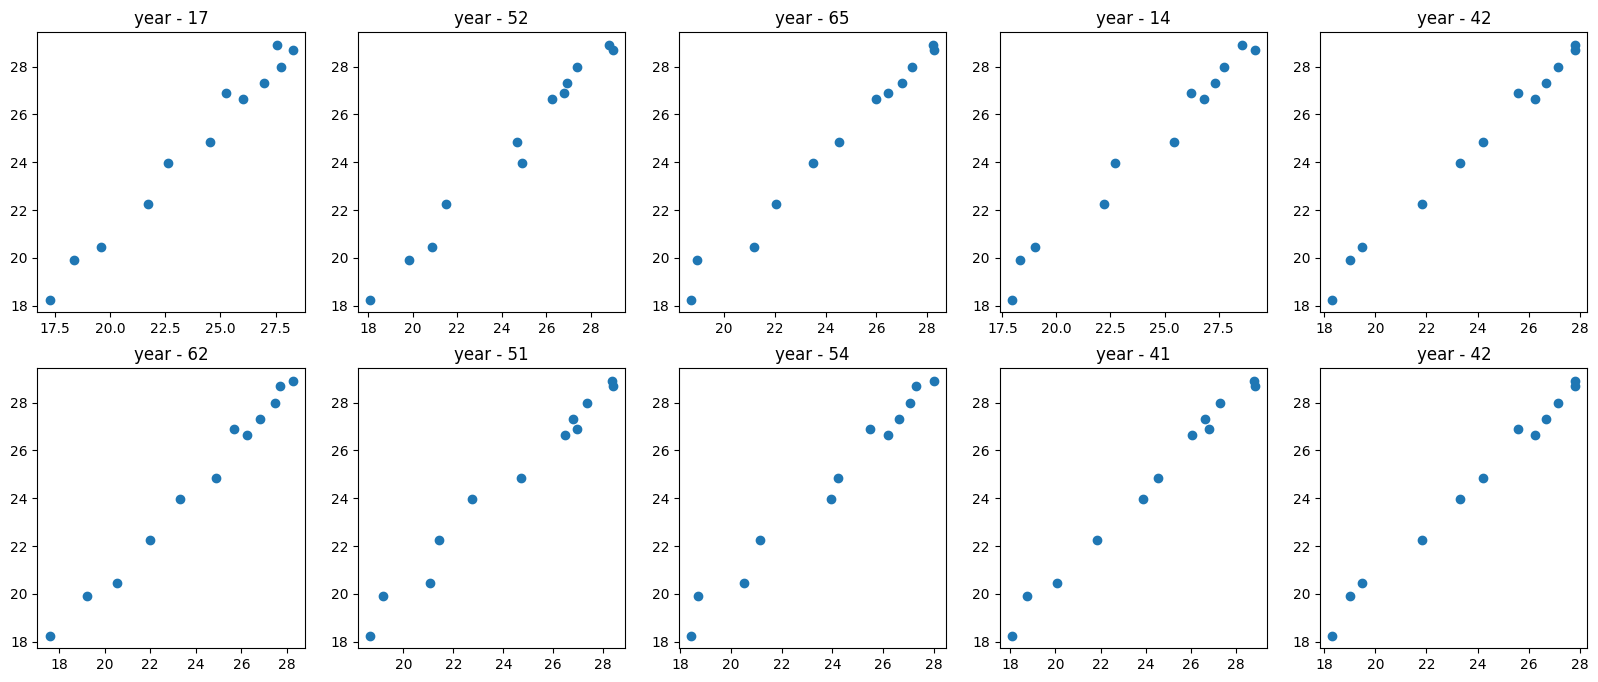

In [74]:
random_years = np.random.randint(0, 92, 10)

fig, axis = plt.subplots(2,5, figsize = (20, 8))

year = 0
for r in range(2):
    for c in range(5):
        try:
            axis[r, c].scatter(df[random_years[year]], df[111])
            title = 'year - ' + str(random_years[year])
            axis[r, c].set_title(title)
            #print()
        except KeyError:
            pass
        year = year + 1

- the above plots show that the relation between the x-varibles and y-variables is linear.

## the distrubution of the data also plays a major role in model selection

C:\Users\srich\AppData\Local\Temp\ipykernel_18140\257197050.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(df.iloc[c, :], ax=axs[r, c], kde=True, hist=True)
C:\Users\srich\AppData\Local\Temp\ipykernel_18140\257197050.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(df.iloc[c, :], ax=axs[r,

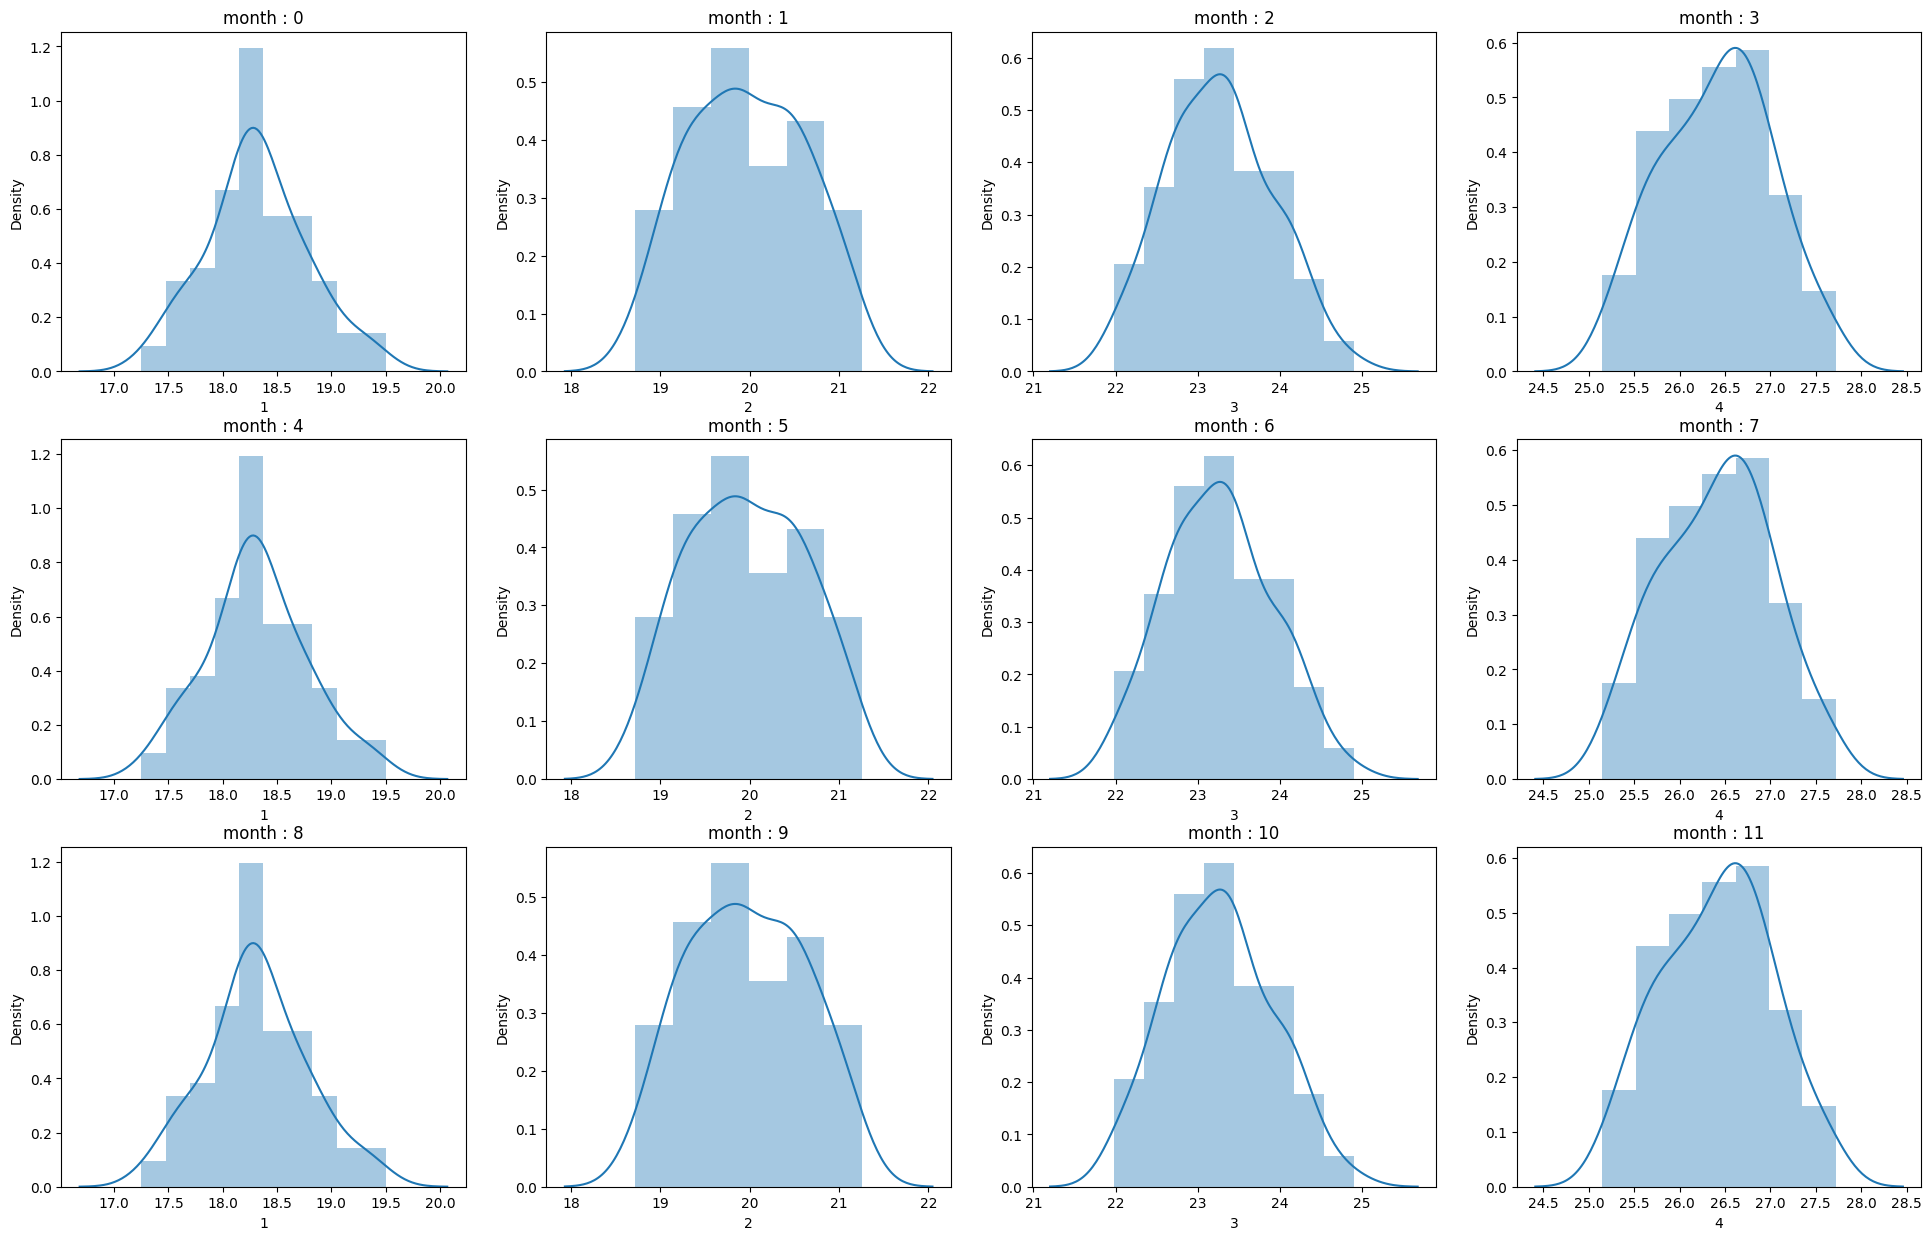

In [75]:
fig, axs = plt.subplots(3, 4, figsize = (24, 15))

row = 0
for r in range(3):
    for c in range(4):
        sn.distplot(df.iloc[c, :], ax=axs[r, c], kde=True, hist=True)
        title = 'month : ' + str(row)
        axs[r, c].set_title(title)
        row = row+1

- the above plots show that the data is normally distributed w.r.t features, and the data is not skewed also

## from the above plots it is very clear that the variables of the dataset are linearly related and normally distributed without skewness
- so we are going to use Linear Regression
- another reason for choosing Linear Regression is that it fits better for small datasets

## Scaling
- it is always a good practice to scale the data while dealing with models that use Geometry and distance in fitting the data
- scaling helps in quicker convergence and easy to interprete

In [76]:
# making a copy of original mean and standard deviation to use it during the re-scaling the output data
df_mean = (df.mean()).mean()
df_mean

24.19047491039427

In [77]:
df_sd = (df.std()).mean()
df_sd

3.6633635307406545

In [78]:
#performing Standard Scaling
scaler = sklearn.preprocessing.StandardScaler()
df = scaler.fit_transform(df)

In [79]:
np.mean(df)

7.640244470538712e-17

In [80]:
np.std(df)

1.0

In [81]:
df

array([[-1.70762512, -1.54157541, -1.70784945, ..., -1.64960914,
        -1.8865174 , -1.82233057],
       [-1.31318905, -1.13929947, -1.25279746, ..., -1.13331356,
        -1.15739528, -1.20433514],
       [-0.20109848, -0.06559895, -0.25280666, ..., -0.37229985,
        -0.17736068, -0.19796643],
       ...,
       [ 0.23442467,  0.01254098,  0.14325711, ...,  0.0455116 ,
         0.23590692,  0.04866478],
       [-0.683187  , -0.86725675, -0.78089169, ..., -0.70654901,
        -0.55225343, -0.68555915],
       [-1.44466774, -1.60524498, -1.40729042, ..., -1.52725007,
        -1.43782686, -1.35174689]])

## performing Train-Test Split

In [82]:
x = df[:, :-1]
x

array([[-1.70762512, -1.54157541, -1.70784945, ..., -1.60399047,
        -1.64960914, -1.8865174 ],
       [-1.31318905, -1.13929947, -1.25279746, ..., -1.18454502,
        -1.13331356, -1.15739528],
       [-0.20109848, -0.06559895, -0.25280666, ..., -0.12719295,
        -0.37229985, -0.17736068],
       ...,
       [ 0.23442467,  0.01254098,  0.14325711, ...,  0.07670414,
         0.0455116 ,  0.23590692],
       [-0.683187  , -0.86725675, -0.78089169, ..., -0.82918151,
        -0.70654901, -0.55225343],
       [-1.44466774, -1.60524498, -1.40729042, ..., -1.55738542,
        -1.52725007, -1.43782686]])

In [83]:
y = df[:, -1:]
y

array([[-1.82233057],
       [-1.20433514],
       [-0.19796643],
       [ 0.62697243],
       [ 1.14574841],
       [ 1.1996104 ],
       [ 0.93597015],
       [ 0.74603577],
       [ 0.55893624],
       [ 0.04866478],
       [-0.68555915],
       [-1.35174689]])

In [84]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.2, random_state=42)

## Model Training

In [85]:
from sklearn.linear_model import LinearRegression
import sklearn.metrics

In [86]:
# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(x_train, y_train)

LinearRegression()

In [87]:
# Make predictions on the testing data
y_pred = model.predict(x_test)
y_pred

array([[-0.65492855],
       [ 0.14969601],
       [-1.60530608]])

In [88]:
mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.019415057447285985


In [89]:
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 0.13933792537312298


In [90]:
r_square = sklearn.metrics.r2_score(y_test, y_pred)
print("R Squared Error:", r_square)

R Squared Error: 0.9672286373898419


- above scores demonstrate that the model is quite accurate

## Hyperparameter tuning
- hyperparameter tuning helps in generalizing the model, further preventing overfitting

In [91]:
param_grid = { 'fit_intercept' : [True, False],
               'n_jobs' : [-1, None],
               'positive' : [True, False]}

In [92]:
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(estimator = model,
                                   param_distributions = param_grid,
                                   n_iter = 50, 
                                   cv = 5,
                                   scoring= sklearn.metrics.r2_score,
                                   random_state = 42)

In [93]:
random_search.fit(x_train, y_train)

C:\Users\srich\miniconda3\envs\tf\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 8 is smaller than n_iter=50. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\srich\miniconda3\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\srich\miniconda3\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\srich\miniconda3\envs\tf\lib\site-packages\sklearn\utils\_param_validation.py", line 192, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "C:\Users\srich\miniconda3\envs\tf\lib\inspect.py", line 3045, in bind
    return self._bind(args, kwargs)
  File "C:\Users\srich\miniconda3\envs\tf\lib\inspect.py", l

RandomizedSearchCV(cv=5, estimator=LinearRegression(), n_iter=50,
                   param_distributions={'fit_intercept': [True, False],
                                        'n_jobs': [-1, None],
                                        'positive': [True, False]},
                   random_state=42,
                   scoring=<function r2_score at 0x00000281FB7CE550>)

In [94]:
random_search.best_params_

{'positive': True, 'n_jobs': -1, 'fit_intercept': True}

In [95]:
best_model = LinearRegression(positive = True,
                              n_jobs = -1,
                              fit_intercept = True)

In [96]:
best_model.fit(x_train, y_train)

LinearRegression(n_jobs=-1, positive=True)

In [97]:
y_pred = best_model.predict(x_test)

In [98]:
r_square = sklearn.metrics.r2_score(y_test, y_pred)
print("R Squared Error:", r_square)

R Squared Error: 0.9646835246819201




# This markdown section helps in understanding the exact transformation performed on the dataset, hence telling about the shape of input data should be :
1. to remove outliers we have trimmed the dataset, which reduced the row (number of years) from 117 to 93.
2. we have transposed the dataset such that years are now columns and months are rows.
3. we have chosen the last column as the target variable. so, out of 93 features 92 are inputs and the 93rd column is the target variable.
4. when the tarin-test split is performed, the rows are splitted into 9 training-months and 3 testing-months.
5. using this processed dataset, the model is built.

*`Most important thing to be noted is, our model is built in such a way that it needs exactly previous 92 years data to predict the required year correctly, because we have passed 92 years data as features while training the model. At the same time, not all 12 months data of all 92 years is mandatory. Whichever month's data (of all 92 years) is given as input, temperature prediction of those months is made.`*

In [99]:
x_test.shape

(3, 92)

In [100]:
x_train.shape

(9, 92)

## making predictions for the year `2018`

In [101]:
df.shape

(12, 93)

In [102]:
# as per above discussion, we need to pass data of 92 years before 2018 (1926 - 2017)
ip_data = df[:, 1:]

In [103]:
ip_data.shape

(12, 92)

In [104]:
temp_2018 = best_model.predict(ip_data)

In [105]:
temp_2018

array([[-1.56321379],
       [-1.08203521],
       [-0.34390658],
       [ 0.78406238],
       [ 1.14961477],
       [ 1.12999743],
       [ 0.88235846],
       [ 0.73341247],
       [ 0.62473479],
       [ 0.13668297],
       [-0.73171746],
       [-1.43831344]])

In [106]:
temp_2018.shape

(12, 1)

## rescaling to original data form
- before performing the modelling, we have scaled the data using standard scaler.
- but in the final output we need the temperatures in the original format, so we need to rescale it.

*standard scaling formula:*
`df_scaled = (df - df_mean) / df_sd`


*reversing formula:*
`x_original = (x_scaled * df_sd) + df_mean`

In [107]:
# the origianl mean and standard deviation are copied before scaling for the use during re-scaling

original_temp_2018 = (temp_2018 * df_sd) + df_mean
original_temp_2018 = original_temp_2018.round(2)
original_temp_2018

array([[18.46],
       [20.23],
       [22.93],
       [27.06],
       [28.4 ],
       [28.33],
       [27.42],
       [26.88],
       [26.48],
       [24.69],
       [21.51],
       [18.92]])

## Creating output dataframe

In [108]:
op_data = pd.DataFrame({'ID': range(0, 12),
                         'Month' : range(1,13)
                        })
op_data['Prediction'] = original_temp_2018
op_data['Year'] = 2018
op_data.to_csv('predictions_2018.csv', index=False)

## making predictions for the year `2019`
- we need to pass data of 92 years before 2019 (1927 - 2018)
- for that we need to append the 2018-predictions to the original dataset

In [109]:
#shape before appending
df.shape

(12, 93)

In [110]:
# appending the 2018-predictions to the original dataset
df = np.concatenate((df, temp_2018), axis=1)

In [111]:
#shpe after appending
df.shape

(12, 94)

In [112]:
# making prediction with the best model
ip_data = df[:, 2:] #data of 92 years before 2019 (1927 - 2018)
temp_2019 = best_model.predict(ip_data)
temp_2019

array([[-1.56371867],
       [-1.09970507],
       [-0.24381538],
       [ 0.60509027],
       [ 1.14376995],
       [ 1.20733019],
       [ 0.90921739],
       [ 0.75271865],
       [ 0.59859165],
       [ 0.12575433],
       [-0.69489576],
       [-1.45866076]])

In [113]:
# rescaling to original form
original_temp_2019 = (temp_2019 * df_sd) + df_mean
original_temp_2019 = original_temp_2019.round(2)
original_temp_2019

array([[18.46],
       [20.16],
       [23.3 ],
       [26.41],
       [28.38],
       [28.61],
       [27.52],
       [26.95],
       [26.38],
       [24.65],
       [21.64],
       [18.85]])

## creating output file

In [114]:
## creating and adding 2019-predictions 2018 dataframe
op_data1 = pd.DataFrame({'ID': range(12, 24),
                         'Month' : range(1,13)
                        })
op_data1['Prediction'] = original_temp_2019
op_data1['Year'] = 2019

combined_df = pd.concat([op_data, op_data1], ignore_index=True)

#saving as .csv file
combined_df.to_csv('predictions.csv', index=False)